In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("ecommerce_sales_dataset.csv")
df.head()

,order_id,customer_id,product_category,payment_method,order_amount,discount,city,order_date
0,1001,2102,Home,Credit Card,201,38,Lahore,2024-01-01
1,1002,2435,Clothing,Credit Card,488,30,Islamabad,2024-01-02
2,1003,2860,Clothing,Credit Card,417,17,Multan,2024-01-03
3,1004,2270,Home,Online,242,35,Islamabad,2024-01-04
4,1005,2106,Clothing,Credit Card,330,1,Lahore,2024-01-05


In [3]:
df.shape

(500, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_id          500 non-null    int64 
 1   customer_id       500 non-null    int64 
 2   product_category  500 non-null    object
 3   payment_method    500 non-null    object
 4   order_amount      500 non-null    int64 
 5   discount          500 non-null    int64 
 6   city              500 non-null    object
 7   order_date        500 non-null    object
dtypes: int64(4), object(4)
memory usage: 31.4+ KB


In [5]:
df.isnull().sum()

order_id            0
customer_id         0
product_category    0
payment_method      0
order_amount        0
discount            0
city                0
order_date          0
dtype: int64

In [6]:
df.describe()

,order_id,customer_id,order_amount,discount
count,500.000000,500.000000,500.00000,500.000000
mean,1250.500000,2497.062000,256.20200,24.526000
std,144.481833,288.267074,139.32388,14.429475
min,1001.000000,2001.000000,21.00000,0.000000
25%,1125.750000,2240.750000,137.50000,12.000000
50%,1250.500000,2494.000000,255.00000,25.000000
75%,1375.250000,2744.750000,375.00000,37.000000
max,1500.000000,2996.000000,498.00000,49.000000


In [7]:
df['order_amount'].sum()

np.int64(128101)

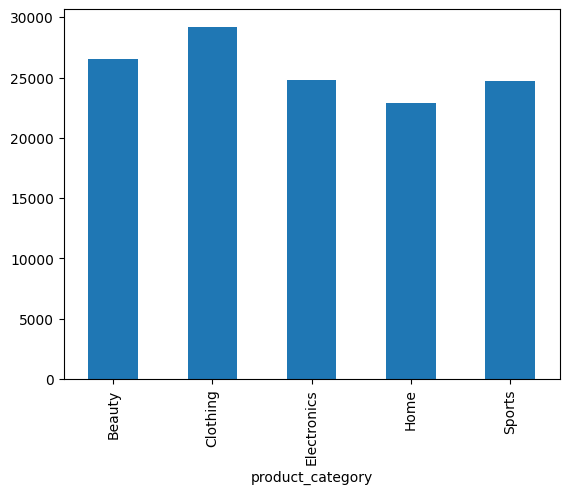

In [8]:
df.groupby('product_category')['order_amount'].sum().plot(kind='bar')
plt.show()

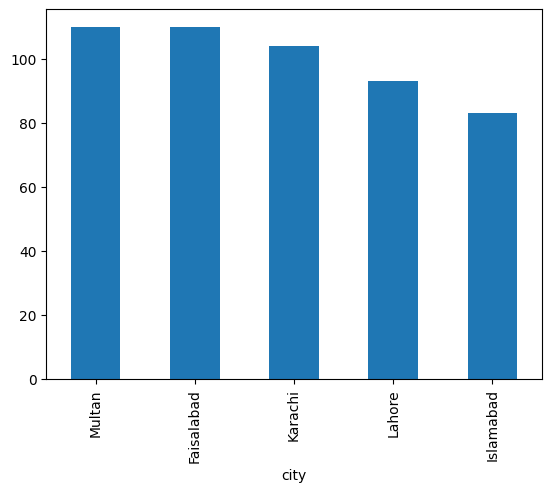

In [9]:
df['city'].value_counts().plot(kind='bar')
plt.show()

In [10]:
df.groupby('payment_method')['order_amount'].sum()

payment_method
Cash           33596
Credit Card    32339
Debit Card     32030
Online         30136
Name: order_amount, dtype: int64

In [11]:
df.groupby('product_category')['discount'].mean()

product_category
Beauty         23.380531
Clothing       24.954128
Electronics    25.730000
Home           24.552941
Sports         24.096774
Name: discount, dtype: float64

In [12]:
df.groupby('customer_id')['order_amount'].sum().sort_values(ascending=False).head()

customer_id
2639    1304
2957    1058
2510     991
2282     976
2345     961
Name: order_amount, dtype: int64

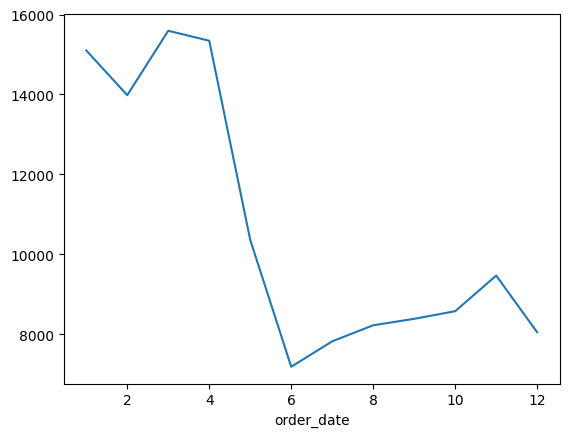

In [13]:
df['order_date'] = pd.to_datetime(df['order_date'])

df.groupby(df['order_date'].dt.month)['order_amount'].sum().plot()
plt.show()

In [14]:
df[['order_amount','discount']].corr()

,order_amount,discount
order_amount,1.000000,-0.064653
discount,-0.064653,1.000000
